In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../../datasets_merged/df_mergedFinal.csv")
numerical_columns = df.select_dtypes(include=['number'])
df_num=numerical_columns.drop(columns=['Annee_Souverainete','Break_1','Break_2', 'Break_3', 'Break_4', 'Break_5','Political_Regime', 'Mean_Rank_Univ'])
df_num

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Primary,Lower_Secondary,End_Of_The_School_Year_Break,Literacy_Rate_2021,...,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Averageiq_Ici2017Score,Averageiqpisa2022Meanscoremathematics,Averageiqpisa2022Meanscorereading,Averageiqpisa2022Meanscorescience,Gdp_Percapita,Indice_Evolution,Nb_Foreign_Students
0,4.500000,574.000000,0.0,0.0,144098.0,5853838.0,NaN,NaN,NaN,37.27,...,NaN,1.426650e+10,82.12,NaN,368.0,358.0,376.0,346.873954,3.303561,NaN
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,NaN,NaN,NaN,NaN,...,3.09,1.793057e+10,81.75,23.4,NaN,NaN,NaN,6455.209751,57.635801,NaN
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,NaN,NaN,NaN,NaN,...,6.30,1.634724e+11,76.00,19.1,378.0,401.0,406.0,3640.548936,58.718531,NaN
3,4.504762,201.476190,0.0,0.0,45574.0,11132.0,NaN,NaN,NaN,NaN,...,2.58,3.325144e+09,95.20,NaN,NaN,NaN,NaN,41655.939232,NaN,NaN
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,NaN,NaN,NaN,NaN,...,2.30,6.650513e+10,75.10,NaN,487.0,498.0,507.0,1868.699719,38.136729,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,4.340741,372.740741,1.0,0.0,1324193.0,5415337.0,NaN,NaN,NaN,NaN,...,NaN,4.823593e+11,82.99,26.8,NaN,NaN,NaN,17043.477492,80.016326,NaN
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,NaN,NaN,NaN,NaN,...,2.95,3.661376e+11,89.53,25.1,NaN,NaN,NaN,3728.987606,47.202375,NaN
194,4.280000,48.250000,1.0,0.0,387113.0,1301166.0,NaN,NaN,NaN,NaN,...,NaN,2.160616e+10,62.86,NaN,NaN,NaN,NaN,641.196791,18.858729,NaN
195,3.975000,288.250000,0.0,0.0,187955.0,200700.0,NaN,NaN,NaN,NaN,...,3.11,2.209642e+10,68.43,18.9,NaN,NaN,NaN,1103.845323,18.397422,NaN


In [3]:
df_num.drop(['Averageiq_Ici2017Score', 'Averageiqpisa2022Meanscoremathematics','Averageiqpisa2022Meanscorereading','Averageiqpisa2022Meanscorescience'], axis=1, inplace=True)

# Supprimer les colonnes avec moind de 130 valeurs rensignées
df_num.drop(['Primary',"Lower_Secondary","End_Of_The_School_Year_Break","Literacy_Rate_2021","Global_rank_Literacy_rate","Nb_graduates","Nb_Foreign_Students" ], axis=1, inplace=True)


In [4]:
# Garder une trace des noms de pays et continents
df_num_country_continent=df_num.copy()
df_num_country_continent['Country']=df.Country
df_num_country_continent['Continent']=df.Continent

In [5]:
df_num.describe().loc['count']

Notes_Musees                           197.0
Nbvotes_Musees_Clean                   197.0
Nb_Prixnobel                           197.0
Nb_Univtop500                          197.0
Immigrationbycountry_Immigrants        192.0
Immigrationbycountry_Emigrants         192.0
Area                                   190.0
Population                             192.0
Education_Spending_2021                138.0
Gdp                                    197.0
Averageiqbycountry_Iqlynnbecker2019    197.0
Gdp_Percapita                          191.0
Indice_Evolution                       162.0
Name: count, dtype: float64

In [6]:
df_num_clean=df_num.dropna()
df_num_country_continent=df_num_country_continent.dropna()
print(df_num_country_continent.shape)
df_num_clean

(115, 15)


,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Gdp_Percapita,Indice_Evolution
1,4.530769,659.500000,0.0,0.0,48810.0,1250451.0,28748.0,2777689.0,3.09,1.793057e+10,81.75,6455.209751,57.635801
2,4.350000,184.000000,2.0,0.0,250378.0,2022337.0,2381741.0,44903225.0,6.30,1.634724e+11,76.00,3640.548936,58.718531
4,4.205263,98.947368,0.0,0.0,656434.0,668066.0,1246700.0,35588987.0,2.30,6.650513e+10,75.10,1868.699719,38.136729
6,4.585185,12605.000000,5.0,1.0,2281728.0,1076148.0,2780400.0,46234830.0,4.65,4.879026e+11,86.63,10552.706091,49.311711
7,4.703704,223.592593,1.0,0.0,190349.0,958190.0,29743.0,2780469.0,2.77,1.387891e+10,88.82,4991.571073,146.810914
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,4.662963,26222.222222,137.0,49.0,9359587.0,4732510.0,243610.0,66971395.0,5.33,3.141506e+12,99.12,46908.178583,147.975327
189,4.540741,1484.518519,0.0,0.0,108267.0,367060.0,176215.0,3422794.0,4.41,6.141227e+10,87.59,17942.145583,90.161536
190,4.450000,189.583333,0.0,0.0,1162007.0,2027823.0,447400.0,35648100.0,5.37,6.960061e+10,89.01,1952.435473,59.164711
193,0.000000,0.000000,1.0,0.0,76767.0,3392025.0,331340.0,98186856.0,2.95,3.661376e+11,89.53,3728.987606,47.202375


In [7]:
# Normaliser les données
scaler = StandardScaler()
df_num_norm=pd.DataFrame(scaler.fit_transform(df_num_clean), columns=df_num_clean.columns)

## Agglomerative Clustering

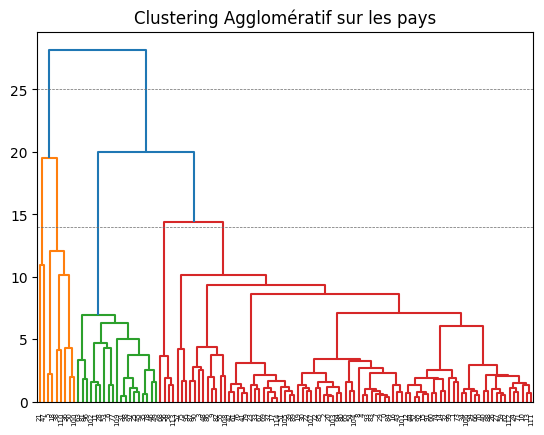

In [8]:
modele_agglomerativeClustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

modele_agglomerativeClustering.fit(df_num_norm)

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
plt.title("Clustering Agglomératif sur les pays")
# plot the top three levels of the dendrogram
plot_dendrogram(modele_agglomerativeClustering)
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 14, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

On remarque un saut important entre 2 et 4 classes, puis entre 5 et 6 classes. On imagine donc qu'on pourrait couper la hiérarchie à ces 2 niveaux 

In [9]:
# Appliquer le clustering pour obtenir 5 classes
modele_agglomerativeClustering = AgglomerativeClustering(n_clusters=5)
modele_agglomerativeClustering.fit(df_num_norm)
labels=modele_agglomerativeClustering.labels_

df_agglomerativeClust=df_num_country_continent.loc[:,["Country", 'Continent']]
df_agglomerativeClust['classe']=labels
df_agglomerativeClust

,Country,Continent,classe
1,Albania,europe,3
2,Algeria,africa,3
4,Angola,africa,3
6,Argentina,south-america,3
7,Armenia,asia,3
...,...,...,...
187,United Kingdom,europe,0
189,Uruguay,south-america,3
190,Uzbekistan,asia,3
193,Vietnam,asia,4


In [10]:
# Afficher pour chaque classe, les pays qui y appartiennent
liste_pays=[]
for classe in np.unique(df_agglomerativeClust.classe):
    pays_classe_i=df_agglomerativeClust.loc[df_agglomerativeClust['classe']==classe,:]["Country"].tolist()
    print("Les pays appartenants au cluster",str(classe+1)," sont :", pays_classe_i)
    liste_pays.append(pays_classe_i)
    

Les pays appartenants au cluster 1  sont : ['Australia', 'Canada', 'France', 'Germany', 'Italy', 'Spain', 'United Kingdom']
Les pays appartenants au cluster 2  sont : ['China', 'India']
Les pays appartenants au cluster 3  sont : ['Austria', 'Belgium', 'Croatia', 'Denmark', 'Estonia', 'Finland', 'Hungary', 'Iceland', 'Israel', 'Japan', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Singapore', 'Slovakia', 'Slovenia', 'Sweden', 'United Arab Emirates']
Les pays appartenants au cluster 4  sont : ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belize', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'DR Congo', 'Costa Rica', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'El Salvador', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Indonesia', 'Ivory Coast', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati'

In [11]:
# Afficher le Silhouette score
silhouette_avg = silhouette_score(df_num_norm, modele_agglomerativeClustering.labels_)
print("Le score de silhouette moyen est :", silhouette_avg)

Le score de silhouette moyen est : 0.4042155205813808


## Kmeans

In [12]:
kmeans = KMeans(n_clusters = 5, random_state=10)
kmeans.fit(df_num_norm)
print("Le nombre de pays par cluster :")
pd.Series(kmeans.labels_).value_counts()

Le nombre de pays par cluster :


1    84
0    22
4     4
2     3
3     2
Name: count, dtype: int64

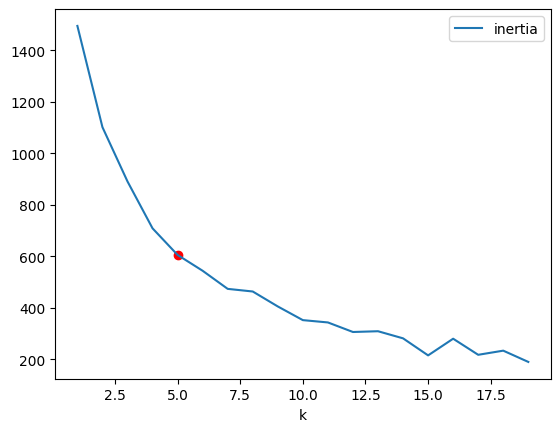

In [13]:
# Choix du nombre k de clusters à former
inertia = []
for k in range(1, 20):
    kmeans_i = KMeans(n_clusters = k, init = "random", n_init = 20).fit(df_num_norm)
    inertia = inertia + [kmeans_i.inertia_]
inertia = pd.DataFrame({"k": range(1, 20), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(5, inertia.query('k == 5')["inertia"], c = "red")
plt.show()

In [14]:
# Afficher le Silhouette score
silhouette_avg = silhouette_score(df_num_norm, kmeans.labels_)
print("Le score de silhouette moyen est :", silhouette_avg)

Le score de silhouette moyen est : 0.43196653261559714


In [15]:
# Afficher les statistiques par rapport à chaque cluster (note : effectuer l'analyse sur le dataset avant normalisation)
clusters_desc = df_num_clean.assign(classe = kmeans.labels_) 
clusters_desc.groupby("classe").mean()

,Notes_Musees,Nbvotes_Musees_Clean,Nb_Prixnobel,Nb_Univtop500,Immigrationbycountry_Immigrants,Immigrationbycountry_Emigrants,Area,Population,Education_Spending_2021,Gdp,Averageiqbycountry_Iqlynnbecker2019,Gdp_Percapita,Indice_Evolution
classe,,,,,,,,,,,,,
0,4.526639,7057.744013,11.772727,7.181818,2.636131e+06,6.376137e+05,9.529626e+05,1.872462e+07,5.229091,8.295921e+11,97.958636,53283.913999,597.517466
1,4.331095,1406.003454,0.976190,0.476190,7.036185e+05,1.274088e+06,4.481978e+05,2.703822e+07,4.321786,1.067888e+11,76.907857,6422.712990,80.659680
2,4.579012,23498.518519,109.000000,31.666667,1.121564e+07,3.643229e+06,4.149973e+05,7.291356e+07,5.036667,3.459789e+12,98.850000,47167.948783,77.639189
3,4.403063,12952.562678,9.000000,20.000000,2.959190e+06,1.416533e+07,6.442112e+06,1.414674e+09,3.970000,1.048538e+13,90.170000,7421.054633,24.053009
4,0.000000,0.000000,0.500000,0.000000,3.226012e+05,1.331554e+06,2.872055e+05,4.006873e+07,3.757500,1.281889e+11,84.247500,10578.812300,170.354271


In [16]:
# Afficher pour chaque classe, les pays qui y appartiennent
clusters_desc["Country"]=df_num_country_continent['Country']
clusters_desc["Continent"]=df_num_country_continent['Continent']
df_kmeans=clusters_desc.loc[:,["Country", 'Continent','classe']]
df_kmeans

,Country,Continent,classe
1,Albania,europe,1
2,Algeria,africa,1
4,Angola,africa,1
6,Argentina,south-america,1
7,Armenia,asia,1
...,...,...,...
187,United Kingdom,europe,2
189,Uruguay,south-america,1
190,Uzbekistan,asia,1
193,Vietnam,asia,4


In [17]:
df_kmeans.to_csv("labels_pays_kmeans.csv",index=False)

In [18]:
liste_pays=[]
for classe in np.unique(df_kmeans.classe):
    pays_classe_i=df_kmeans.loc[df_kmeans['classe']==classe,:]["Country"].tolist()
    print("Les pays appartenants au cluster",str(classe+1)," sont :", pays_classe_i)
    liste_pays.append(pays_classe_i)
    

Les pays appartenants au cluster 1  sont : ['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Estonia', 'Finland', 'Hungary', 'Iceland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Arab Emirates']
Les pays appartenants au cluster 2  sont : ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belize', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'DR Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'El Salvador', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Indonesia', 'Ivory Coast', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati', 'Latvia', 'Lesotho', 'Liberia', 'Lithuania', 'Madagascar', 'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius', 'Moldova', 'Mongolia', 'M

## Visualisation des données

In [19]:
# Appliquer la PCA
pca = PCA()
df_num_pca=pca.fit_transform(df_num_norm)
df_num_pca_df = pd.DataFrame({
    "Dim1" : df_num_pca[:,0], 
    "Dim2" : df_num_pca[:,1]
})


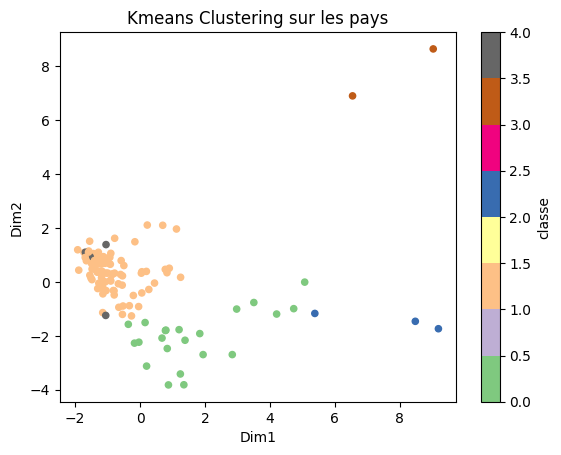

In [20]:
clusters_pca = df_num_pca_df.assign(classe = kmeans.labels_)
clusters_pca.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.title("Kmeans Clustering sur les pays")
plt.show()

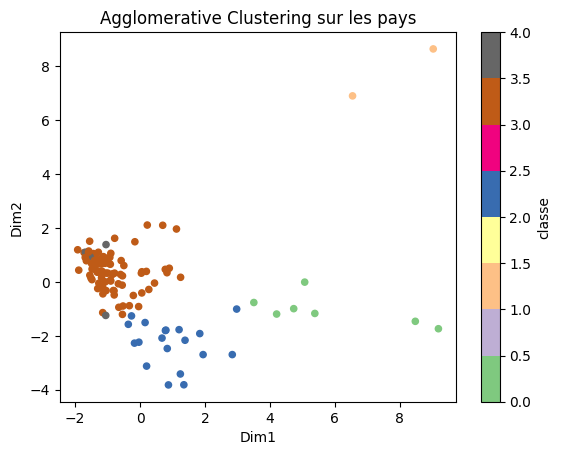

In [21]:
clusters_pca = df_num_pca_df.assign(classe = modele_agglomerativeClustering.labels_)
clusters_pca.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.title("Agglomerative Clustering sur les pays")
plt.show()